# Project 3 by Hsin Chen
### Partners: Rose Garay, Ashley Chang

# Part 1: Regression analysis of Gapminder data


In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
from ggplot import *
from sklearn import linear_model

data = pd.read_csv('08_gap-every-five-years.tsv', sep='\t')
data.head(6)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360


## Exercise 1
### Make a scatter plot of life expectancy across time.

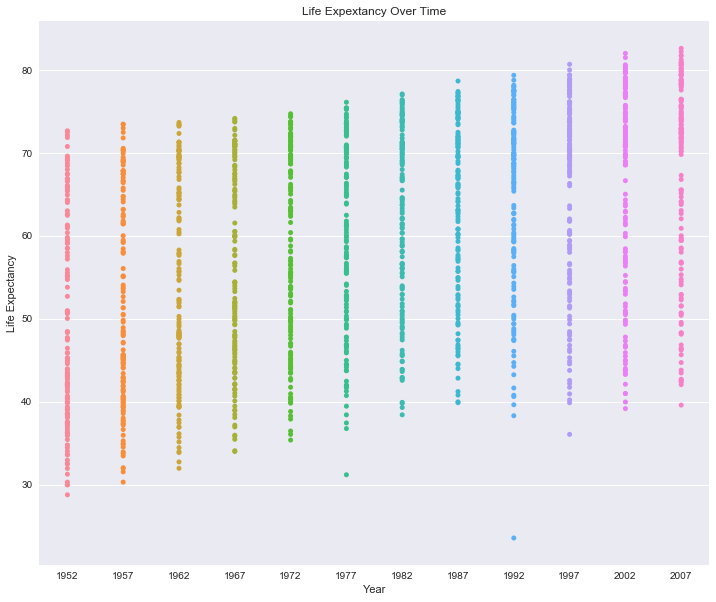

In [97]:
plt.figure(figsize = (12, 10))
sns.stripplot(x = "year", y = "lifeExp", data = data)

plt.title("Life Expextancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")


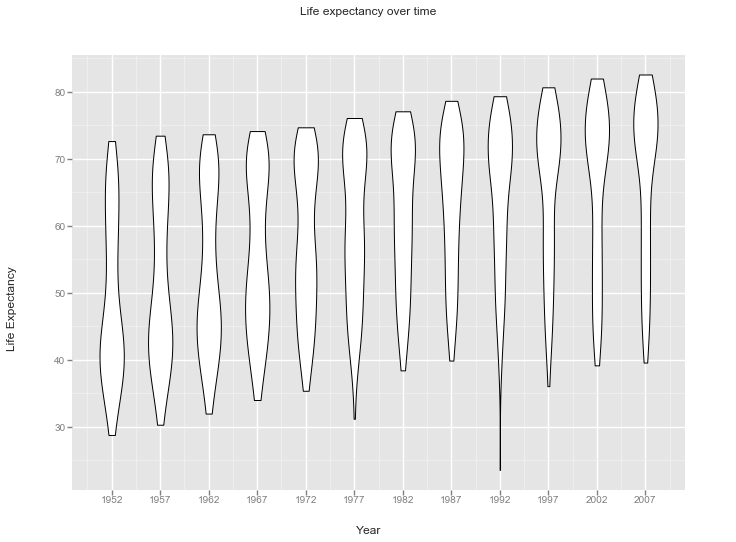

<ggplot: (-9223372036554648113)>

In [98]:
plt.figure(figsize = (12, 10))
ggplot(aes(x = 'year', y = 'lifeExp'), data = data) + geom_violin() +\
labs(title="Life expectancy over time",
         x = "Year",
         y = "Life Expectancy")

### Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?
Yes, there is a general increasing trend for life expactancy across time. It is linear because in the earlier years the life expectancy is concentrated at the bottom, and the more recent it is, life expectancy becomes more concentrated at the top.

### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?
The distribution is skewed, since there is an obvious tail in some years (1977 & 1992). It is not symmetric around its center because it is not a normal distribution. It is not unimodal because there are more than one mode in some years.

### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?
Yes, because there is some positive relationship between life expectancy and year, which means we would reject the null hypothesis of no relationship.

### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? 
The violin plot of residuals should look linear as well.

### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like?
The plot should look like a normal distribution, which means it should be symmetric and centers around 0.

## Exercise 2
### Fit a linear regression model for life expectancy vs. year (as a continuous variable).

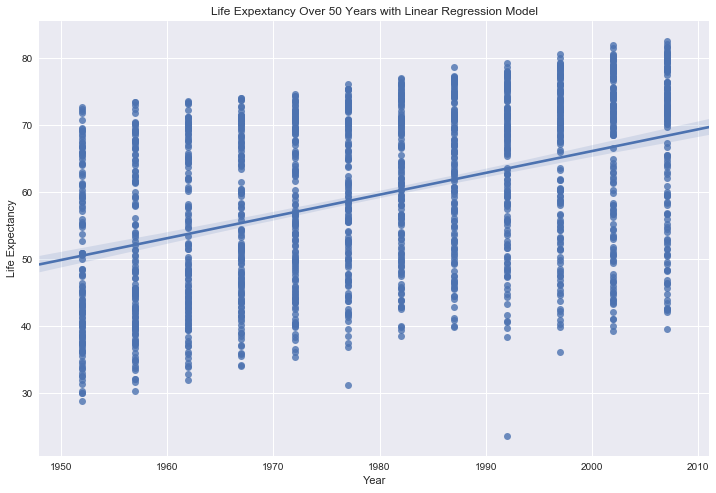

In [99]:
plt.figure(figsize = (12, 8))
sns.regplot(x = "year", y = "lifeExp", data = data)
plt.title("Life Expextancy Over 50 Years with Linear Regression Model")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

### Question 6: On average, by how much does life expectancy increase every year around the world?
Life expectancy increases by 0.3259 years every year.

In [100]:
result1 = ols(formula = "lifeExp ~ year", data = data).fit()
print (result1.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           7.55e-80
Time:                        23:37:46   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?
Yes, the null hypothesis is rejected because the p value is 0, which means the probability that the null hypothesis is true corresponds to 0.

## Exercise 3
### Make a violin plot of residuals vs. year for the linear model from Exercise 2.

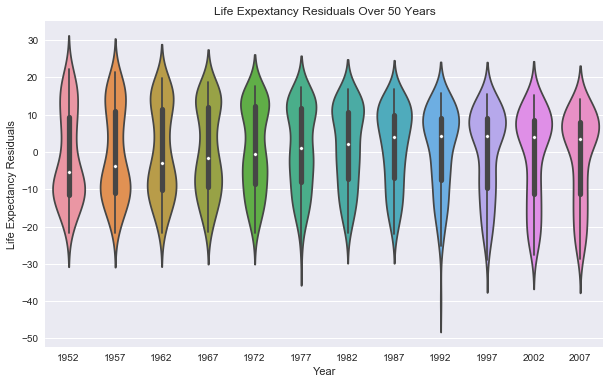

In [101]:
slope = result1.params.year
a = result1.params.Intercept

data['expected'] = 0.0
for i, row in data.iterrows():
    e = slope * (row['year']) + a
    data.set_value(i, 'expected', e)
data['residuals'] = data['lifeExp'] - data['expected']

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'year', y = 'residuals', data = data)
plt.title("Life Expextancy Residuals Over 50 Years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residuals")


### Question 8: Does the plot of Exercise 3 match your expectations?
Yes. It turns out not being a normally distributed plot, is skewed, multimodal and centers around 0.

## Exercise 4
### Make a boxplot (or violin plot) of model residuals vs. continent.

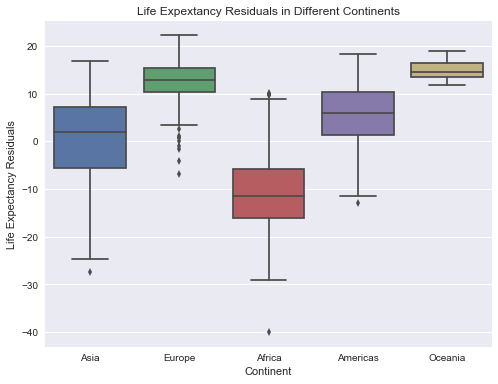

In [102]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'continent', y = 'residuals', data = data)
plt.title("Life Expextancy Residuals in Different Continents")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy Residuals")

### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?
Yes, there is a dependence between model residual and continent, since each box is different in different continent. This suggests that each continent affects the overall life expectancy across time by specific, varying amounts. 

## Exercise 5
### Make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

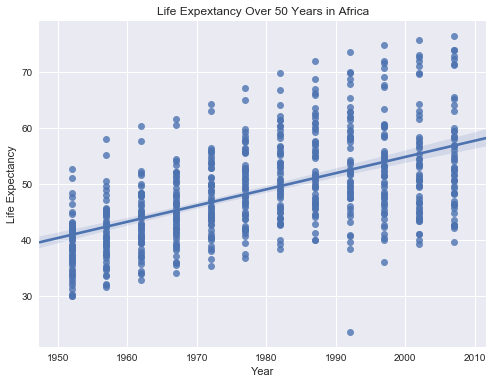

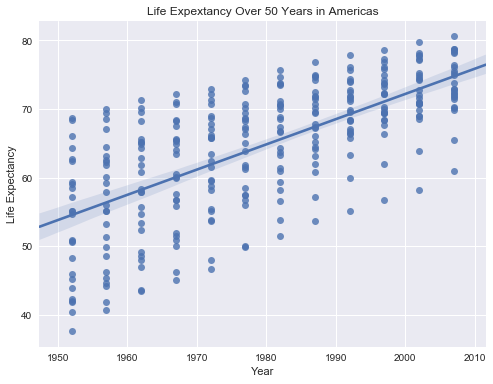

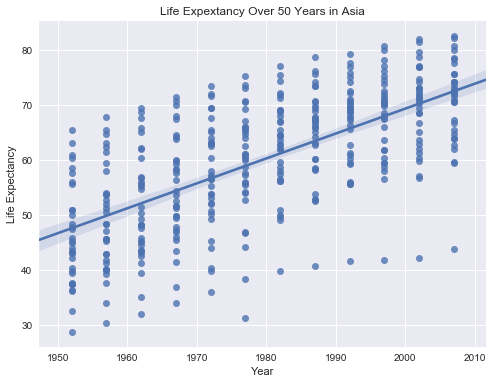

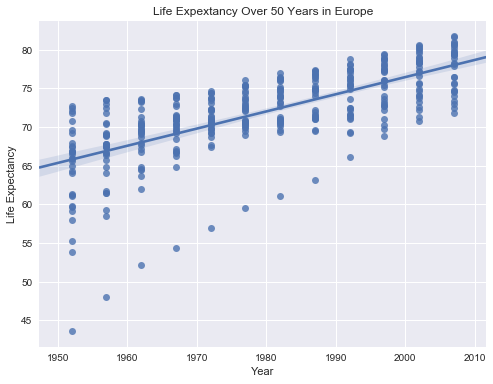

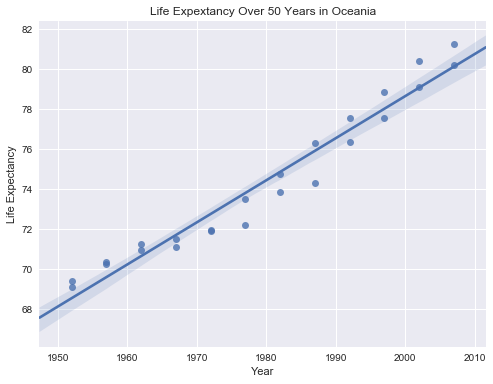

In [103]:
continent = np.unique(data['continent'])

for c in continent:
    p = data.drop(data[c != data['continent']].index)
    plt.figure(figsize = (8, 6))
    sns.regplot(x = "year", y = "lifeExp", data = p)
    plt.title("Life Expextancy Over 50 Years in " + c)
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")

### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?
Yes, because the data is very different in every continent, which means that each continent plays a significant role in effecting the life expactancy throughout time.

## Exercise 6
### Fit a linear regression model for life expectancy including a term for an interaction between continent and year.

In [104]:
regression = ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 20 Nov 2017   Prob (F-statistic):               0.00
Time:                        23:37:49   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?
They are all significantly different from 0, with p values less than 0.05. Yet Oceania has a p value of 0.287 without an interaction term and of 0.360 with an interaction term; as a result, it is not significantly different from 0.

### Question 12: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

In [105]:
regression.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

From the above, we can tell that life expectancy in Africa increases by 0.289529 years on average, Americas increases by 0.078122 years on average, Asia increases by 0.163593 years on average, Europe decreases by 0.067597 years on average and Oceania decreases by 0.079257 years on average.

## Exercise 7
### Perform an F-test that compares how well two models fit your data: (a) the linear regression models from Exercise 2 (only including year as a covariate) and (b) Exercise 6 (including interaction between year and continent).

In [106]:
# F test for model a - simple linear regression
print("F test value for Linear Regression/Model 1:", result1.fvalue)
print("p value for Linear Regression/Model 1:", result1.f_pvalue)

# F test for model b - interaction 
print("F test value for Model 2:", regression.fvalue)
print("p value for Linear Model 2:", result1.f_pvalue)

F test value for Linear Regression/Model 1: 398.604745712
p value for Linear Regression/Model 1: 7.5467946256e-80
F test value for Model 2: 424.27290234
p value for Linear Model 2: 7.5467946256e-80


### Question 13: Is the interaction model significantly better than the year-only model? Why?
Yes, the interaction model has a significantly higher F test score with a better p value, and therfore is a better model.

## Exercise 8: 
### Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.
It fits the assumptions because it is normally distributed.

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy

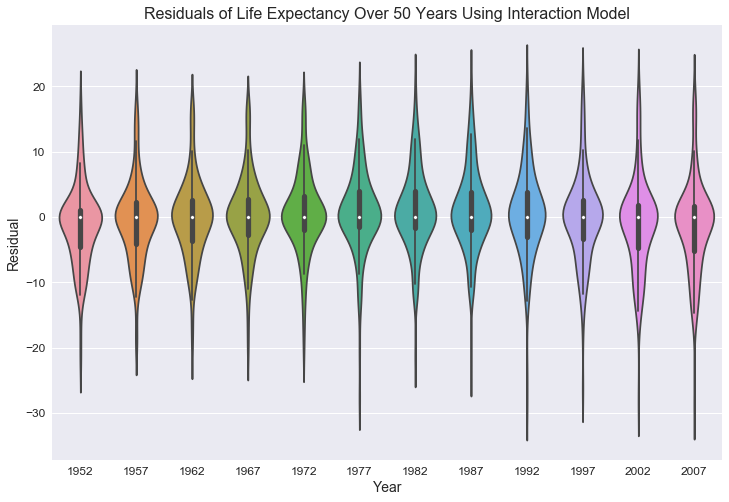

In [107]:
e8 = data[['continent', 'year', 'lifeExp']];
e8 = e8.sort_values(by='continent').reset_index(drop=True)

mAF = regression.params[5]
bAF = regression.params[0]
mAM = mAF + regression.params[6]
bAM = bAF + regression.params[1]
mAS = mAF + regression.params[7]
bAS = bAF + regression.params[2]
mEU = mAF + regression.params[8]
bEU = bAF + regression.params[3]
mOC = mAF + regression.params[9]
bOC = bAF + regression.params[4]

e8['res'] = 0

e8['res'][e8['continent'] == 'Africa']  = e8['lifeExp'] - ((mAF*e8['year'])+bAF)
e8['res'][e8['continent'] == 'America'] = e8['lifeExp'] - ((mAM*e8['year'])+bAM)
e8['res'][e8['continent'] == 'Asia']    = e8['lifeExp'] - ((mAS*e8['year'])+bAS)
e8['res'][e8['continent'] == 'Europe']  = e8['lifeExp'] - ((mEU*e8['year'])+bEU)
e8['res'][e8['continent'] == 'Oceania'] = e8['lifeExp'] - ((mOC*e8['year'])+bOC)

plt.figure(figsize=(12,8))
sns.violinplot(x='year', y='res', data=e8);
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Residual', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Residuals of Life Expectancy Over 50 Years Using Interaction Model', fontsize=16)

# Part 2: Classification

In [120]:
import sklearn.datasets
import sklearn.linear_model as lm
from numpy import array

## Problem 1: 
### Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., extend the version of the algorithm in the lecture notes to multiple parameters.

In [313]:
# Explanation of parameters
# (X, y): training data
# T: number of steps
# alpha: step size

def grad_descent_linreg(X, y, T, alpha): 
    m, n = X.shape       # m = #examples, n = #features
    theta = np.zeros(n)  # initialize parameters
    cost = np.zeros(T)   # track loss over time
    
    for i in range(T):  
        # calculate cost for current parameter vector theta
        cost[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        grad = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*grad
    return theta, cost

## Problem 2:
### Derive the above update equation.

The gradient descent update equation for logistic regression is given by: 
$$\beta^{k+1} = \beta^{k} + \alpha\sum_{i=1}^{n}(y_i - p_i(\beta^k))x_i$$
where (from the definition of log-odds), 

$$\begin{align}p_i(\beta^k) = \frac{e^{f_i(\beta^k)}}{1+e^{f_i(\beta^k)}}
\textrm{ and } 
f_i(\beta^k) = \beta_0^k + \beta_1^k x_{i1} + \beta_2^k x_{i2} + ... + \beta_p^k x_{ip}\end{align}$$

<br>

First, let's define a generic cost function, C which is simply the sum of all individual costs: 
$$C = \sum_{i=1}^{n} cost(p_i(\beta^k), y_i)$$

We need a convex cost function so that gradient descent can converge to a global minimum. 
If we let y be the binary classification, we can define cost as: 
$$cost(p_i(\beta^k), y_i) =
  \begin{cases}
    -log(p_i(\beta^k)      & \text{if $y=1$} \\
    -log(1 - p_i(\beta^k)) & \text{if $y=0$}
  \end{cases}
$$

Since y is either 0 or 1, we can re-write (removing i's for readability/simplicity): 
$$ cost(p(\beta^k), y) = -ylog(p(\beta^k)) - (1-y)log(1-p(\beta^k))$$ <br>

When y = 1, $cost = -1log(p(\beta^k)) - (1-1)log(1-p(\beta^k)) = -log(p(\beta^k))$.

When y = 0, $cost = -0log(p(\beta^k)) - (1-0)log(1-p(\beta^k)) = -log(1-p(\beta^k))$.

Thus, the cost function over i parameters is: 
$$-\sum_{i=1}^{n} y log(p(\beta^k)) + (1-y)log(1-p(\beta^k))$$

<br>

Now let's re-visit the logit function. We can manipulate this: 
$$p_i(\beta^k) 
= \frac{e^{f_i(\beta^k)}}{1+e^{f_i(\beta^k)}} * \frac{1+e^{-f_i(\beta^k)}}{1+e^{-f_i(\beta^k)}} 
= \frac{e^{f_i(\beta^k)}+e^{f_i(\beta^k)}e^{-f_i(\beta^k)}}{(1+e^{f_i(\beta^k)})(1+e^{-f_i(\beta^k)})}
= \frac{e^{f_i(\beta^k)}+1}{(e^{f_i(\beta^k)}+1)(1+e^{-f_i(\beta^k)})}
= \frac{1}{(1+e^{-f_i(\beta^k)})}
$$

so we see that (again removing i's for readability/simplicity):
$$p(\beta^k) = \frac{e^{f(\beta^k)}}{1+e^{f(\beta^k)}} = \frac{1}{1+e^{-f(\beta^k)}}$$

Let's also take the derivative of the logit, as it will be useful later. 
$$p(\beta^k) 
= \frac{1}{1+e^{-f(\beta^k)}} 
= (1+e^{-f(\beta^k)})^{-1} $$ 

$$p'(\beta^k) 
= -(1+e^{-f(\beta^k)})^{-2} * -e^{-f(\beta^k)} * f'(\beta^k) 
= \frac{e^{-f(\beta^k)}}{(1+e^{-x})^2} * f'(\beta^k) 
= \frac{1}{1+e^{-f(\beta^k)}} * \frac{e^{-f(\beta^k)}}{1+e^{-f(\beta^k)}} * f'(\beta^k) 
= \frac{1}{1+e^{-f(\beta^k)}} * (1 - \frac{1}{1+e^{-f(\beta^k)}}) * f'(\beta^k) 
$$

$$p'(\beta^k) 
= p(\beta^k)(1-p(\beta^k)) * f'(\beta^k)
$$

<br>

To minimize this cost, we will use the gradient like we did previously for linear regression. Let's set L to be the argument of the summation (the expression to the right of the Sigma).
$$L(\beta^k) = y log(p(\beta^k)) + (1-y)log(1-p(\beta^k))$$

Then,
$$
\frac{\partial}{\partial \beta^k}L(\beta^k) = y * \frac{1}{p(\beta^k)} * p'(\beta^k) + (1-y) * \frac{1}{1-p(\beta^k)} * -p'\beta^k
$$

$$ = \bigg(\frac{y}{p(\beta^k)} - \frac{1-y}{1-p(\beta^k)}\bigg)p'\beta^k $$ <br>
$$ = \bigg(\frac{y}{p(\beta^k)} - \frac{1-y}{1-p(\beta^k)}\bigg)(p(\beta^k)(1-p(\beta^k)) * f'(\beta^k))$$ <br>
$$ = \bigg(\frac{y(p(\beta^k))(1-p(\beta^k))}{p(\beta^k)} - \frac{(1-y)(p(\beta^k))(1-p(\beta^k))}{1-p(\beta^k)}\bigg) * \frac{\partial}{\partial \beta^k}f(\beta^k)$$ <br>
$$ = \Big(y(1-p(\beta^k)) - (1-y)(p(\beta^k))\Big)x_i$$ <br>
$$ = \Big(y-yp(\beta^k) - p(\beta^k) + yp(\beta^k)\Big)x_i$$ <br> 
$$ = (y - p(\beta^k))x_i$$

We will repeatedly update each parameter using the learning rate, alpha, and the gradient (which is the partial derivative of the cost function). Here is the generic equation: 
$$ \theta_{n+1} = \theta{n} -  \alpha \cdot \nabla $$

In our case, this subtraction will actually turn into an addition because there was a negative outside of our summation. The double negatives will cancel to make a positive.

Thus, our specific update equation is: 
$$\beta^{k+1} = \beta^{k} + \alpha\sum_{i=1}^{n}(y_i - p_i(\beta^k))x_i$$

## Problem 3:
### Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

Make sure you include in your submission writeup, which version of the algorithm you are solving (stochastic or batch), and make sure to comment your code to help us understand your implementation.

In [314]:
# Explanation of parameters
# (X, y): training data
# T: number of steps
# alpha: step size

# This logit function is the p_i(b^k) specified in the project description.
def logit(x):
    return (np.exp(x)/(1+np.exp(x)))

# We are using the batch version of logistic gradient descent. 
def logistic_grad_descent(X, y, T, alpha):
    m, n = X.shape          # m = #examples, n = #features
    theta = np.zeros(n)     # initialize parameters
    cost2 = np.zeros(T)      # track loss over time
    
    for i in range(T):
        p = logit(X.dot(theta))
        # calculate cost for current parameter vector theta
        cost2[i] = (np.log(1+np.exp(p.dot(y))))
        # compute steepest ascent at f(theta)
        g = X.T.dot(p-y)
        # step down the gradient
        theta = theta + alpha*g
    return theta, cost2

## Problem 4:
### To test your programs, simulate data from the linear regression and logistic regression models and check that your implementations recover the simulation parameters properly.

In [315]:
# simulate data for linear regression
gen_data_x, gen_data_y, coef = \
sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef=True)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y, log_coef = \
sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef=True)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

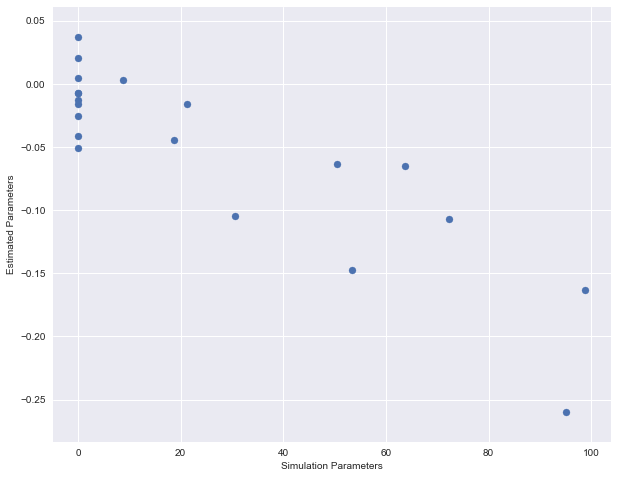

In [316]:
theta, cost = log_grad_descent(gen_data_x, gen_data_y, 2000, .00000001)

plt.figure(figsize=(10,8))
plt.scatter(coef,theta)
plt.xlabel('Simulation Parameters', fontsize=10)
plt.ylabel('Estimated Parameters', fontsize=10)

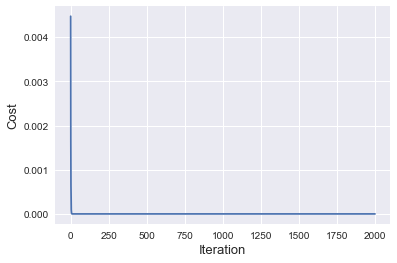

In [317]:
plt.plot(np.arange(2000), cost)
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Cost', fontsize=13)
plt.show()

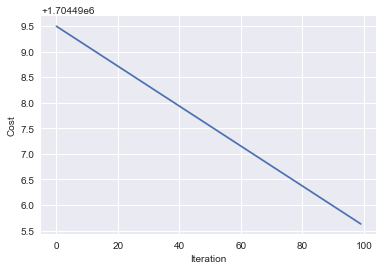

In [319]:
theta, cost = grad_descent_linreg(gen_data_x, gen_data_y, 100, .0000000001)
plt.plot(np.arange(100), cost)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Cost', fontsize=10)
plt.show()

The linear gradient descent implementation is a better fit than the logistic gradient descent implementation. However, both seem to be reasonable implementations. With more manipulation of T, the number of iterations, and alpha, the step size, an even better gradient descent implementation could be achieved. For both, we see that as the number of iterations increases, the cost decreases, which is what we want.

# Try it Out

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np

# loading cancer dataset
cancer = load_breast_cancer()

# K nearest neighbors
X_train, X_test, y_train, y_test = \
                                train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
kf = KFold(n_splits=10)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 20
neighbors_setting = range(1,20)

# Using cross validation to tune parameters 
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    k_fold_training_accuracy = []
    for train, test in kf.split(X_train):
        knn.fit(X_train[train],y_train[train])
        k_fold_training_accuracy.append(knn.score(X_train[test], y_train[test]))
    test_accuracy.append(np.mean(k_fold_training_accuracy))

plt.plot(range(1,20), test_accuracy)
#from plotting, we can see that the best k value is 5
best_n_neighbors = KNeighborsClassifier(n_neighbors=5)
best_n_neighbors.fit(X_train,y_train)
print(best_n_neighbors.score(X_test, y_test))

# To get the general accuracy score informed by 10 trials
scores = cross_val_score(best_n_neighbors, cancer.data, cancer.target, cv=10)
print(scores.mean())

In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier    #Random Forest

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=34)


forest_sqrt = RandomForestClassifier(n_estimators=100, random_state=0, max_features='sqrt')

#Using cross validation test to train and fit random forest classifier
scores = cross_val_score(forest_sqrt, X_train, y_train, cv=10)

#training accuracy scored, informed by 10 trials
print(scores.mean())

forest_sqrt.fit(X_train,y_train)
#testing accuracy
print(forest_sqrt.score(X_test,y_test))

In [ ]:
def logit(x):
    return (np.exp(x)/(1+np.exp(x)))

# We are using the batch version of logistic gradient descent. 
def logistic_grad_descent(X, y, T, alpha):
    m, n = X.shape
    theta = np.zeros(n) 
    cost = np.zeros(T)
    
    for i in range(T):
        p = logit(X.dot(theta))
        cost[i] = (np.log(1+np.exp(p.dot(y))))
        g = X.T.dot(p-y)
        theta = theta + alpha*g
    return theta, cost

def score_log_reg(y_pred,y_test):
    count = 0
    length = 0
    for p ,t in zip(y_predict, y_test):
        if p ==t:
            count+=1
        length+=1
    #score:
    return count/length

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=34)
T = 100000
alpha = .0000000000005
theta, f = logistic_grad_descent(X_train, y_train, T, alpha )

y_predict = list(logit(X_test.dot(theta)).round())

#training accuracy scored
print(score_log_reg(list(logit(X_train.dot(theta)).round()), y_train))

#testing accuracy
score = score_log_reg(y_predict, y_test)
print(score)

In [ ]:
#score from training data through 10 fold cross validation
score= []

kf = KFold(n_splits=10)
for train, test in kf.split(cancer.data):
    theta, f = logistic_grad_descent(cancer.data[train], cancer.target[train], T, alpha)
    y_predict = list(logit(cancer.data[test].dot(theta)).round())
    score.append(score_log_reg(y_predict, cancer.target[test]))

# Score from doing cross validation
print(np.mean(score))

We used sklearn's breast cancer data set to predict if a tumor will be malignant or benign. I used cancer.data to predict the results. This consists of numeric values that describe 529 cases with 30 features each.

I chose the knearest neighbors algorithm and the random forests algoritm. For K nearest neighbors, I used 10 fold cross validation to tune the parameters to see which k value would be most accurate from a range of k = 1 to k=20. I then got the general accuracy score informed by 10 trials to be 92% accurate when predicting testing data.
For the random forests algorithm, I used 100 decision trees (high number of estimators) and used sqrt(number of features) for the features to be considered since that gave me the highest accuracy score out of all the options (auto, sqrt, log2, None).

After doing a 10 fold cross validating procedure, I saw that the knearest neighbors alogirthm was 92.9842926281% accurate at predicting given the entire dataset. The random forests algorithm gave me a 97.2027972028% accuracy, and my logistic gradient descent game me 62.7662907268%